nuria -- closest matching rate for 22.69: 21.87 Hz at x = -8%
lo_qui_don -- closest matching rate for 22.43: 22.76 Hz at x = -11%


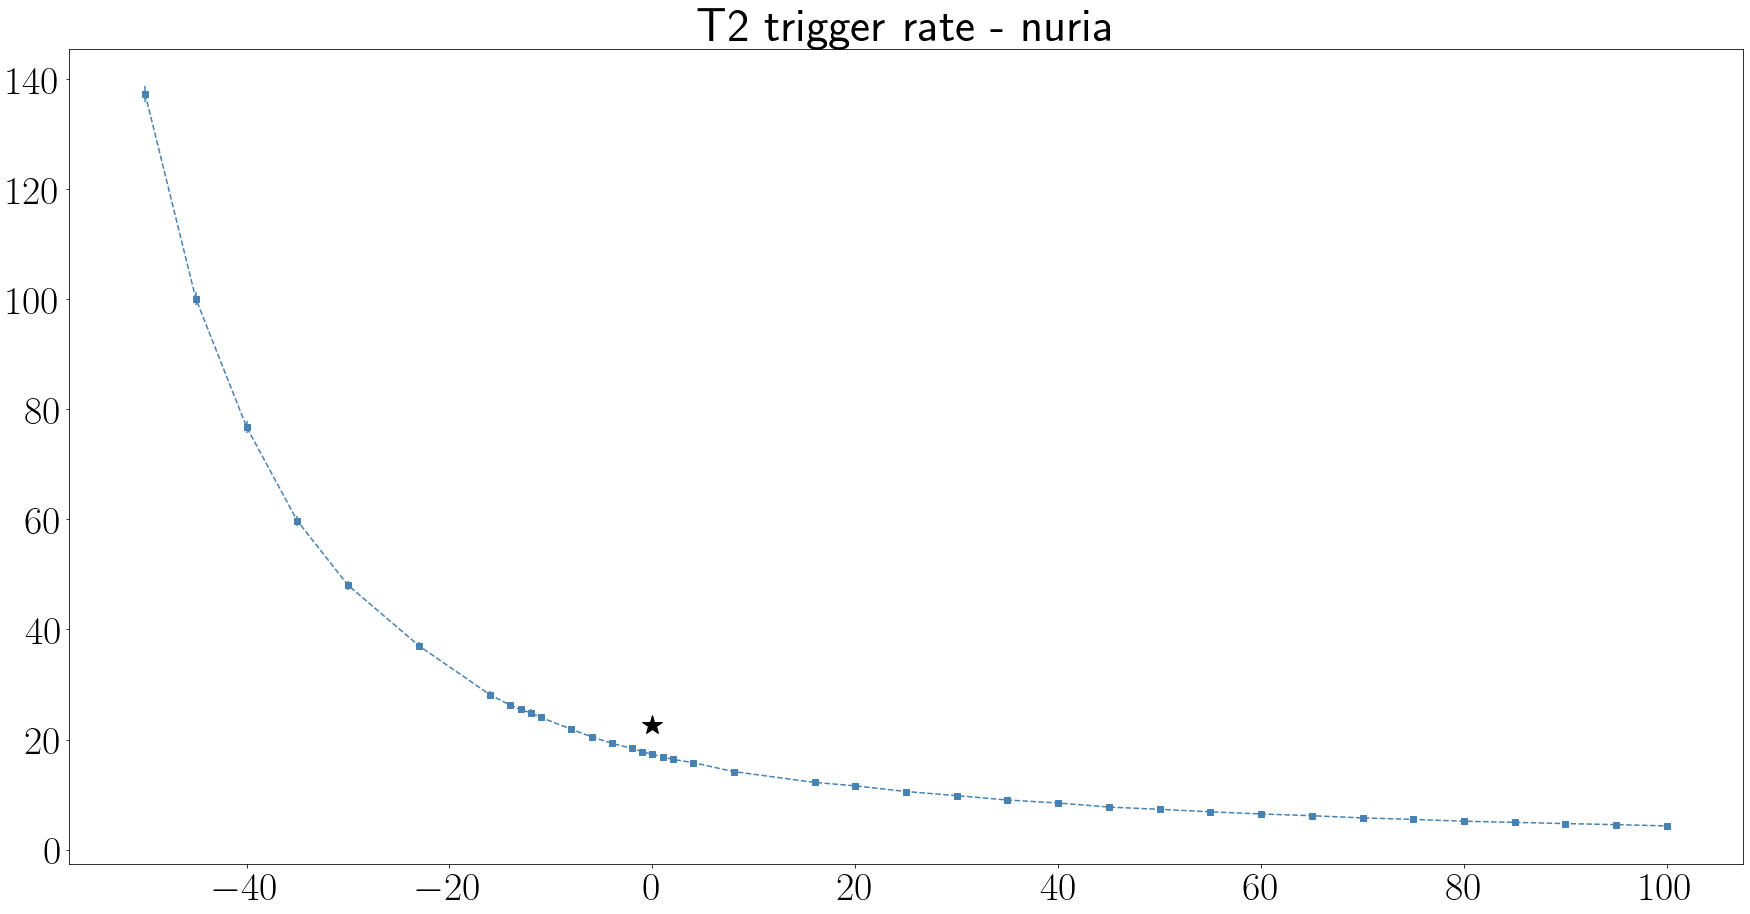

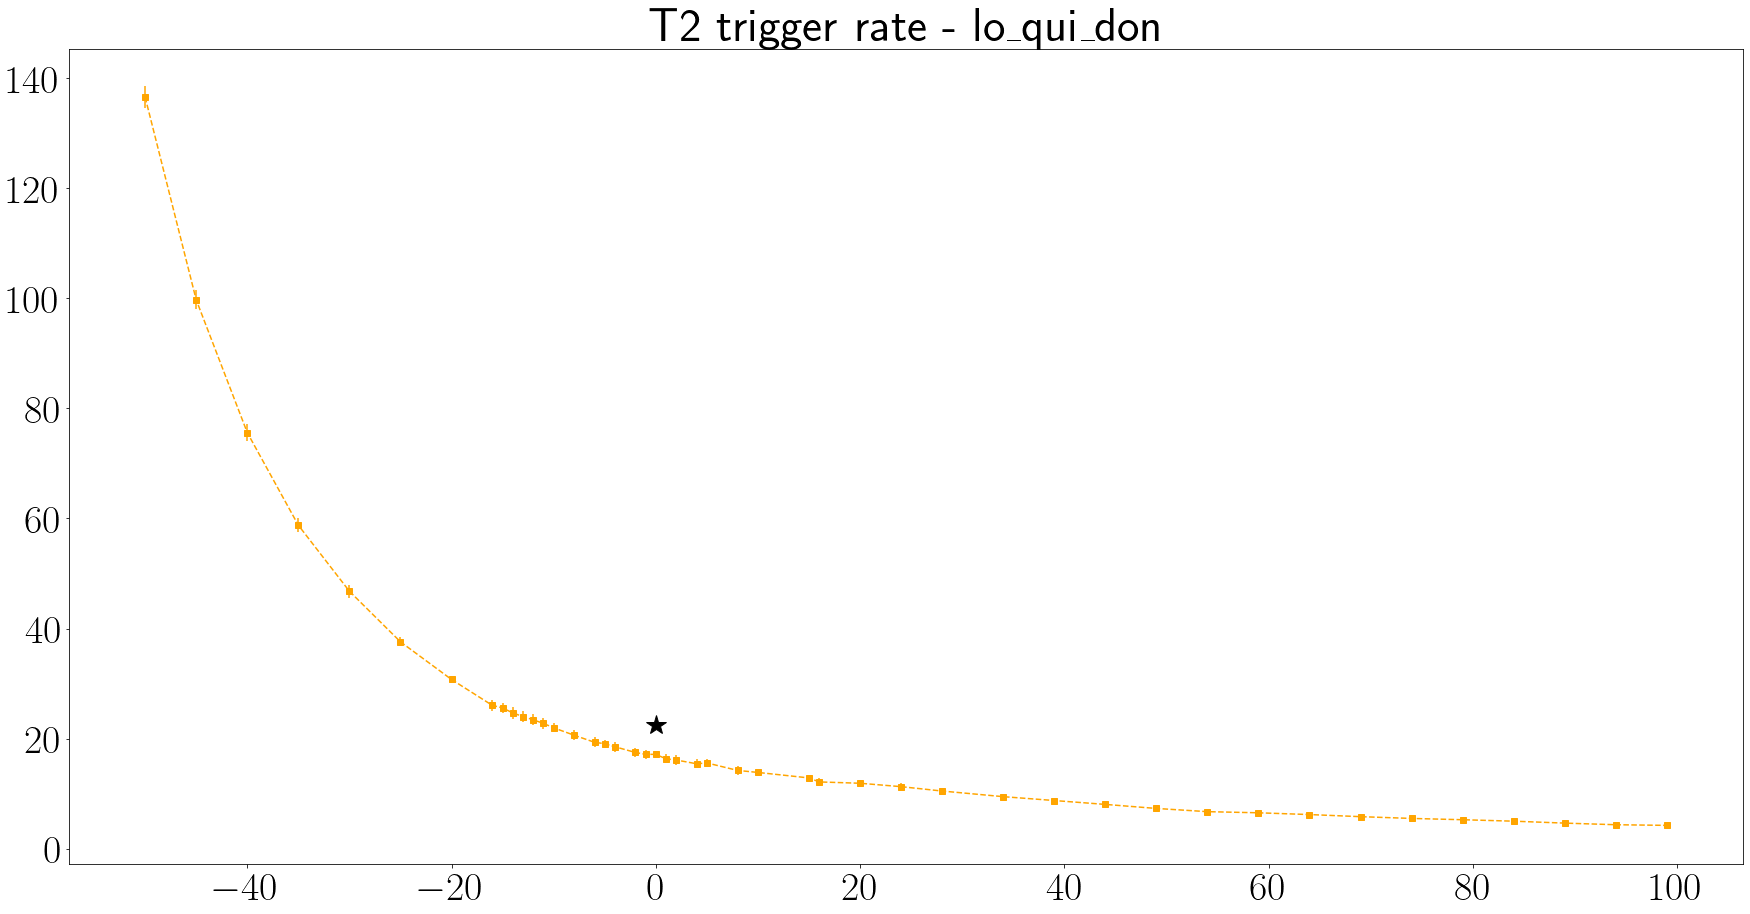

In [1]:
from Binaries import *
import uproot

def neg_exponential(x, a, b):
    return a * np.exp(- b * x)

stations = \
    {
        "nuria" : 56,
        "lo_qui_don" : 1744,
    }

colors = \
    {
        "nuria" : "steelblue",
        "lo_qui_don" : "orange",
    }


production_test_path = "/cr/users/filip/Trigger/RunProductionTest/trigger_output/" 
file = uproot.open("/cr/tempdata01/filip/iRODS/MonitoringData/mc_2022_03_17_00h00.root:SDMonCal")

for directory in os.listdir("./trigger_output_with_mops"):

    x_vals, y_vals, y_vals_err = [], [], []
    file = uproot.open("/cr/tempdata01/filip/iRODS/MonitoringData/mc_2022_03_17_00h00.root:SDMonCal")
    StationIDs = file['SDMonCalBranch']['fLsId'].array()
    data = file['fCalibration']

    # Because fEndSecond is given relative to fStartSecond, we dont need this
    # start = data['fCalibration.fStartSecond'].array()[StationIDs == stations[directory]]
    stop = data['fCalibration.fEndSecond'].array()[StationIDs == stations[directory]]
    n_t2 = data['fCalibration.fT2'].array()[StationIDs == stations[directory]]

    online_rate = np.mean(n_t2 / stop)
    online_rate_err = np.std(n_t2 / stop)

    plt.figure()
    plt.errorbar(0, online_rate, yerr = online_rate_err, c = "k", fmt = "*", markersize = 20)

    for file in os.listdir(f"{production_test_path}/{directory}/"):

        if os.path.isdir(f"{production_test_path}/{directory}/{file}"): continue

        # print("reading", "/cr/users/filip/Trigger/RunProductionTest/trigger_output_with_mops/" + directory + "/" + file)
        t, t2 = np.loadtxt(production_test_path + directory + "/" + file, unpack = True, usecols = [2,3])

        x = float(file.split('_')[-1][1:-4])
        x *= -1 if file.split('_')[-1][0] == "m" else 1
        x_vals.append(x)
        # if x < -17 or x > 5: continue

        my_rate = sum(t2) / sum(t)
        my_rate_err = np.sqrt(sum(t2)) / sum(t)
        y_vals.append(my_rate)
        y_vals_err.append(my_rate_err)

    plt.title(f"T2 trigger rate - {directory}")

    ii = np.argsort(x_vals)
    x_vals = np.array(x_vals)[ii]
    y_vals = np.array(y_vals)[ii]
    y_vals_err = np.array(y_vals_err)[ii]

    plt.errorbar(x_vals, y_vals, y_vals_err, c = colors[directory], fmt = "--s")
    
    closest = np.argmin(np.abs(online_rate - y_vals))

    print(f"{directory} -- closest matching rate for {online_rate:.2f}: {y_vals[closest]:.2f} Hz at x = {x_vals[closest]:.0f}%")

In [2]:
print(data.keys())

['fCalibration.fVersion', 'fCalibration.fIsCalibration', 'fCalibration.fVersion2', 'fCalibration.fTubeMask', 'fCalibration.fStartSecond', 'fCalibration.fEndSecond', 'fCalibration.fT1', 'fCalibration.fT2', 'fCalibration.fTotRate', 'fCalibration.fTotD', 'fCalibration.fMops', 'fCalibration.fPast[3]', 'fCalibration.fAnode[3]', 'fCalibration.fVarianceDynode[3]', 'fCalibration.fDynode[3]', 'fCalibration.fVarianceAnode[3]', 'fCalibration.fUBase[4]', 'fCalibration.fVarianceUBase[4]', 'fCalibration.f70HzRate[3]', 'fCalibration.fTriggerDA[3]', 'fCalibration.fDynodeAnode[3]', 'fCalibration.fVarianceDynodeAnode[3]', 'fCalibration.fDynodeAnodeDt[3]', 'fCalibration.fVarianceDynodeAnodeDt[3]', 'fCalibration.fDynodeAnodeChi2[3]', 'fCalibration.fArea[3]', 'fCalibration.fPeak[3]', 'fCalibration.fListOfMembers']
